In [2]:
import pandas as pd

### 1. Data collection

In [3]:
Data=pd.read_csv("Mall_Customers.csv")
Data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 2.Split the input data

In [4]:
x=Data.iloc[:,3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### 3. Model creation

In [9]:
from sklearn.cluster import MeanShift
MS=MeanShift(bandwidth=15)
y_mean=MS.fit_predict(x)
y_mean

array([4, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3, 4, 3, 4, 3,
       5, 3, 5, 3, 4, 3, 4, 3, 5, 3, 5, 3, 5, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6])

In [10]:
supervised=Data
supervised["Cluster_group"]=y_mean
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,6
196,197,Female,45,126,28,7
197,198,Male,32,126,74,6
198,199,Male,32,137,18,7


In [11]:
centroid=MS.cluster_centers_
centroid

array([[ 56.        ,  49.79710145],
       [ 77.30769231,  83.11538462],
       [ 79.85714286,  12.        ],
       [ 24.75      ,  75.375     ],
       [ 31.08333333,  27.66666667],
       [ 24.58333333,   9.58333333],
       [127.66666667,  78.66666667],
       [127.66666667,  20.66666667]])

### 4. Final result

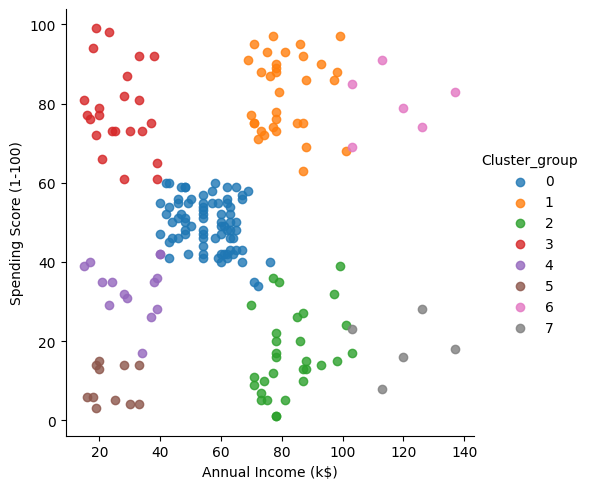

In [12]:
import seaborn as se
Final=se.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], fit_reg=False)

### 5.Evaluation Metric

In [14]:
from sklearn.metrics import silhouette_score
result=silhouette_score(x,y_mean)
result

0.499893048159358